[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/dl/blob/master/frameworks/frameworks.ipynb)

# Neural Network Frameworks

A deep learning *framework* is a library, a set of tools developed to make our lives easiear when it comes to train neural networks. These are some of the advantages than frameworks provide:

- Optimized code
- Parallel processing (GPUs, TPUs, ...)
- Comunity support (new architectures, datasets ...)

All available frameworks have (more or less) the same capabilities, so in the end it is a matter of preference when it comes to choose on framework. Some factors that may impact our choice are:

- Ease of use (understanding what you are doing).
- Ecosystem: research, developement and production (servers, web, mobile, IoT).

Deep Learning is a very importat technology, but in order to unleash its potential it is important than professionals not usually releated to the *computer science* field can make use of it (doctors, architects, historians, artists, athlets, professors ...). This means that the easier a deep learning framework is to use, the most impact can it have.  

## Tensorflow

![tf](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/02/Tensorflow.png?resize=300%2C168&ssl=1)

[Tensorflow](https://www.tensorflow.org/) is the most used deep learning framework in the industry. Developed by Google, it stands out thanks to its great ecosystem. Version 1.X has been famous because of its *difficulty* of understanding and use. It is based on a programming paradigm far from what we are used (it requires to define all the operations of the neural network in a computational graph and then run it). This fact propiciated the appearnce of high-level libraries, such as [Keras](https://keras.io/), to make working with Tensorflow simpler. With the release of Tensorflow 2.0, Keras now comes integrated in Tensorflow and thanks to the *eager mode* by default, now programming with Tensorflow is more accesible.

## Pytorch

![pytorch](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/02/pytorch.jpeg?resize=268%2C188&ssl=1)

Developed by Facebook, [Pytorch](https://pytorch.org/) stands out thanks to its ease of use and flexibility. It is growing in popularity since it's appearance and today it is the preferred choice among researchers. It is also usually the framework used by top winners in DL competitions like Kaggle. A high-level (Keras-like) library also exist to simplify even more working with Pytorch called [fast.ai](https://www.fast.ai/)

## Other frameworks

- [MXNet](https://mxnet.apache.org/) (Amazon)
- [CNTK](https://github.com/microsoft/CNTK) (Microsoft)
- [CoreML](https://developer.apple.com/documentation/coreml) (Apple - iOS)
- [Chainer](https://chainer.org/)

## Interoperability

Some projects are now appearing with the objective of *standarizing* the representation of neural networks so they can be used transparently in any framework (maybe define and train a model in Tensorflow, save it and open it in Pytorch to fine-tune). The best current project on this topic is [ONNX](https://onnx.ai/). Having a common standarized way of representing NNs also allows for optimization (quantization, pruning, ...) and smaller runtimes (important for prodction, specially in IoT).

# Tensorflow & Keras

Let's see how to build our MLP with Keras for a classification task.

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.2.0'

Keras has a number of functions to load popular datasets in [keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets). The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train_full.shape

(60000, 28, 28)

In an image, each pixel is represented by an *uint8* (unsigned 8-bit integer with values between 0-255).

In [3]:
X_train_full.dtype, X_train_full.max(), X_train_full.min()

(dtype('uint8'), 255, 0)

For training Neural Networks we normalize images so they are in the range 0-1.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

It is important to visualize our data before we start trainig.

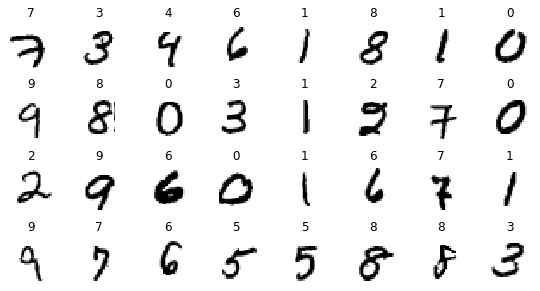

In [5]:
import matplotlib.pyplot as plt

r, c = 4, 8
plt.figure(figsize=(c*1.2, r*1.2))
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

The simplest kind of Keras model is the [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/models) model, where we can stack [Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers).

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

alternatively,

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


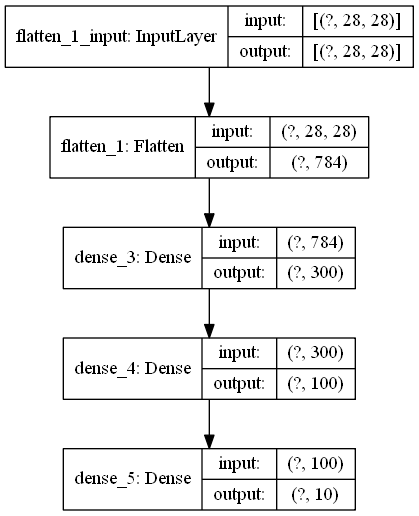

In [9]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

After the model is created you must call *compile* to specify the loss function and the optimizer to use. You can pass extra parameters for more functionality (metrics, callbacks).

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

alternatively,

In [11]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

Now the model is ready to be trained.

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6181 - sparse_categorical_accuracy: 0.8349 - val_loss: 0.3092 - val_sparse_categorical_accuracy: 0.9166
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2888 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.2442 - val_sparse_categorical_accuracy: 0.9338
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2375 - sparse_categorical_accuracy: 0.9314 - val_loss: 0.2065 - val_sparse_categorical_accuracy: 0.9410
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2041 - sparse_categorical_accuracy: 0.9412 - val_loss: 0.1837 - val_sparse_categorical_accuracy: 0.9480
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1792 - sparse_categorical_accuracy: 0.9477 - val_loss: 0.1646 - val_sparse_categorical_accuracy: 0.9548
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1594 - spars

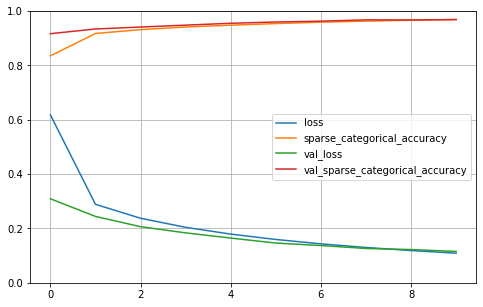

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 888us/step - loss: 0.1190 - sparse_categorical_accuracy: 0.9637


[0.1190260499715805, 0.963699996471405]

Once the model is trained we can use it to make predictions.

In [15]:
X_new = X_test[:25]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.02],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.03, 0.01, 0.  , 0.  , 0.01, 0.01, 0.94],
       [0.01, 0.  , 0.  , 0.  , 0.04, 0.09, 0.86, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.04, 0.  , 0.92],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.99],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.

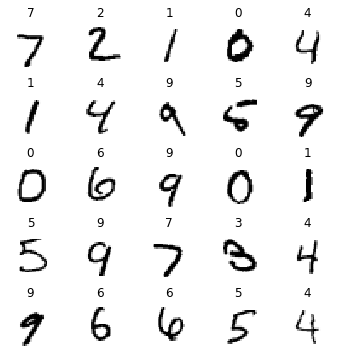

In [16]:
plt.figure(figsize=(6, 6))
for index, image in enumerate(X_new):
    plt.subplot(5, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(y_test[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's see another example, now for a regression task

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 860us/step - loss: 2.2705 - val_loss: 1.1587
Epoch 2/20
363/363 [==============================] - 0s 766us/step - loss: 0.8175 - val_loss: 0.7138
Epoch 3/20
363/363 [==============================] - 0s 762us/step - loss: 0.7155 - val_loss: 0.6652
Epoch 4/20
363/363 [==============================] - 0s 792us/step - loss: 0.6765 - val_loss: 0.6231
Epoch 5/20
363/363 [==============================] - 0s 760us/step - loss: 0.6471 - val_loss: 0.6636
Epoch 6/20
363/363 [==============================] - 0s 747us/step - loss: 0.6227 - val_loss: 0.5805
Epoch 7/20
363/363 [==============================] - 0s 755us/step - loss: 0.5997 - val_loss: 0.5588
Epoch 8/20
363/363 [==============================] - 0s 777us/step - loss: 0.5782 - val_loss: 0.5357
Epoch 9/20
363/363 [==============================] - 0s 770us/step - loss: 0.5585 - val_loss: 0.5224
Epoch 10/20
363/363 [==============================] - 0s 748us/step - loss: 0.540

In [18]:
mse = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 468us/step - loss: 0.4293


In [19]:
X_new = X_test[:10]
y_pred = model.predict(X_new)
y_pred

array([[0.5492861],
       [1.5596366],
       [3.2276473],
       [2.5392234],
       [2.6536322],
       [2.0284574],
       [2.5665789],
       [1.8074352],
       [2.8703787],
       [4.169635 ]], dtype=float32)

We can save and restore models like this

In [20]:
model.save("my_keras_model.h5")

In [21]:
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

array([[0.5492861],
       [1.5596366],
       [3.2276473],
       [2.5392234],
       [2.6536322],
       [2.0284574],
       [2.5665789],
       [1.8074352],
       [2.8703787],
       [4.169635 ]], dtype=float32)

We can modify the behavior of the training flow with [Callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)

In [22]:
# save best model during training
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Epoch 1/10
363/363 [==============================] - 0s 919us/step - loss: 0.4324 - val_loss: 0.4009
Epoch 2/10
363/363 [==============================] - 0s 787us/step - loss: 0.4277 - val_loss: 0.3972
Epoch 3/10
363/363 [==============================] - 0s 816us/step - loss: 0.4243 - val_loss: 0.3965
Epoch 4/10
363/363 [==============================] - 0s 789us/step - loss: 0.4209 - val_loss: 0.3940
Epoch 5/10
363/363 [==============================] - 0s 798us/step - loss: 0.4179 - val_loss: 0.3909
Epoch 6/10
363/363 [==============================] - 0s 738us/step - loss: 0.4157 - val_loss: 0.3909
Epoch 7/10
363/363 [==============================] - 0s 736us/step - loss: 0.4134 - val_loss: 0.3921
Epoch 8/10
363/363 [==============================] - 0s 774us/step - loss: 0.4114 - val_loss: 0.3899
Epoch 9/10
363/363 [==============================] - 0s 769us/step - loss: 0.4093 - val_loss: 0.3847
Epoch 10/10
363/363 [==============================] - 0s 755us/step - loss: 0.407

In [23]:
# stop training if the validation loss does not improve in 3 epochs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10000,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10000
363/363 [==============================] - 0s 862us/step - loss: 0.4056 - val_loss: 0.4030
Epoch 2/10000
363/363 [==============================] - 0s 752us/step - loss: 0.4042 - val_loss: 0.3779
Epoch 3/10000
363/363 [==============================] - 0s 737us/step - loss: 0.4027 - val_loss: 0.3951
Epoch 4/10000
363/363 [==============================] - 0s 763us/step - loss: 0.4014 - val_loss: 0.3752
Epoch 5/10000
363/363 [==============================] - 0s 736us/step - loss: 0.3996 - val_loss: 0.4047
Epoch 6/10000
363/363 [==============================] - 0s 769us/step - loss: 0.3987 - val_loss: 0.3737
Epoch 7/10000
363/363 [==============================] - 0s 766us/step - loss: 0.3971 - val_loss: 0.3813
Epoch 8/10000
363/363 [==============================] - 0s 738us/step - loss: 0.3959 - val_loss: 0.3763
Epoch 9/10000
363/363 [==============================] - 0s 785us/step - loss: 0.3948 - val_loss: 0.3708
Epoch 10/10000
363/363 [==============================]

You can build your own callbacks

In [24]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [25]:
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/3
280/363 [======================>.......] - ETA: 0s - loss: 0.3830
val/train: 0.94
363/363 [==============================] - 0s 752us/step - loss: 0.3913 - val_loss: 0.3677
Epoch 2/3
356/363 [============================>.] - ETA: 0s - loss: 0.3927
val/train: 0.94
363/363 [==============================] - 0s 782us/step - loss: 0.3903 - val_loss: 0.3676
Epoch 3/3
274/363 [=====================>........] - ETA: 0s - loss: 0.3905
val/train: 0.96
363/363 [==============================] - 0s 749us/step - loss: 0.3890 - val_loss: 0.3744


You can use [Keras Tuner](https://github.com/keras-team/keras-tuner) for hyperparameter tuning (in Colab you may need to install it with `pip install -U keras-tuner`).

In [ ]:
#!pip install -U keras-tuner

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8]))
    model.add(layers.Dense(units=hp.Int('units',
                                        min_value=10,
                                        max_value=100,
                                        step=10),
                           activation='relu'))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.SGD(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mean_squared_error'])
    return model

In [27]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner',
    project_name='housing')

INFO:tensorflow:Reloading Oracle from existing project tuner\housing\oracle.json
INFO:tensorflow:Reloading Tuner from tuner\housing\tuner0.json


In [28]:
tuner.search_space_summary()

In [29]:
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=3)])

INFO:tensorflow:Oracle triggered exit


In [30]:
tuner.results_summary()

In [31]:
models = tuner.get_best_models(num_models=2)

In [32]:
models[0].evaluate(X_test, y_test)

162/162 [==============================] - ETA: 0s - loss: 0.4830 - mean_squared_error: 0.48 - ETA: 0s - loss: 0.4590 - mean_squared_error: 0.45 - 0s 580us/step - loss: 0.4509 - mean_squared_error: 0.4509


[0.4509289264678955, 0.4509289264678955]

You can do a lot more things with Keras. To learn more, go to [keras.io](https://keras.io/). It is a well designed high-level API that can be very useful for fast prototyping using common techniques. However, when we need to solve problems that cannot be solved in an "easy standard" way, we need more flexibility. For that, we can use Tensorflow.

In [33]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [34]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

We use [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) to build our dataset.

In [35]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

We can build our network in a more flexible way like this

In [36]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

Then we choose our optimizer, loss function and metrics.

In [37]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name='train_loss')

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

We build our own training loop with [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape)

In [38]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)
    
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [39]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, loss: {}, acc: {}, test_loss: {}, test_acc: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # reset metrics for next epoch.
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, loss: 0.136541947722435, acc: 95.94332885742188, test_loss: 0.06475866585969925, test_acc: 98.05999755859375
Epoch 2, loss: 0.043549396097660065, acc: 98.62999725341797, test_loss: 0.05125649645924568, test_acc: 98.23999786376953
Epoch 3, loss: 0.02455231547355652, acc: 99.17832946777344, test_loss: 0.053913664072752, test_acc: 98.23999786376953
Epoch 4, loss: 0.013990413397550583, acc: 99.52999877929688, test_loss: 0.05622803419828415, test_acc: 98.3699951171875
Epoch 5, loss: 0.00918011646717

Tensorflow gives us a high level API (Keras) that can be really useful in most cases (simple cases) and also a low level API with great flexibility to solve more out-of-the-box problems.

Tensorflow also has great support for deployment on diferent languages and environments. You can learn more at [tensorflow.org](https://www.tensorflow.org/learn).

However...

![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/meme.jpg)

# Pytorch

Pytorch is a low level DL framework (like Tensorflow) with no official high level API (lilke Keras). It offeres great flexibility and simplify a lot of concepts that can be cumbersome when working with Tensorflow. [Fast.ai](https://www.fast.ai/) is a third party high level API built on top of Pytorch used by many DL practicioners looking for a Keras alternative (plus, they have GREAT educational content).

Let's see how to train an MLP for image classification on MNIST with Pytorch.

In [40]:
import torch
import torchvision
torch.__version__

'1.5.0'

We use [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html) to load pre-trained models and datasets for computer vision applications.

In [41]:
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST('./data', train=True, download=True, 
                   transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

test_dataset = torchvision.datasets.MNIST('./data', train=False, 
                   transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ]))

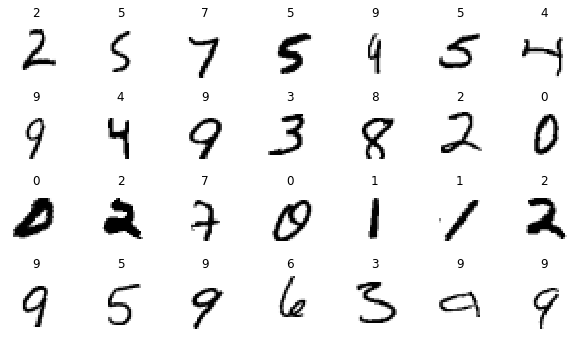

In [42]:
import random 
import matplotlib.pyplot as plt

r, c = 4, 7
fig = plt.subplots(figsize=(c*1.2,r*1.2))
for row in range(r):
  for col in range(c):
    plt.subplot(r, c, c*row+col+1)
    ix = random.randint(0, len(train_dataset)-1)
    img, label = train_dataset[ix]
    plt.imshow(img[0], cmap="binary")
    plt.axis('off')
    plt.title(label)
plt.tight_layout()
plt.show()

Just like Keras, Pytorch has a Sequential API to define sequences of layers to be executed one after another.

In [43]:
model = torch.nn.Sequential(
  torch.nn.Linear(28*28, 100),
  torch.nn.ReLU(),
  torch.nn.Linear(100, 10)    
)

We have also to define an optimizer and a loss function.

In [44]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss = torch.nn.CrossEntropyLoss()

In order to feed images in batches, we have to create a `Dataloader`.

In [45]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10000, shuffle=False)

We don't have a `fit` method in Pytorch models for training, so you have to code your own training loop (like in Tensorflow).

In [46]:
from tqdm import tqdm
import numpy as np

def fit(model, train_loader, test_loader, optimizer, loss, epochs = 5):
  for epoch in range(1, epochs+1):
    # train
    model.train() # VERY IMPORTANT !
    train_loss, train_acc = [], 0
    for imgs, labels in tqdm(train_loader):
      optimizer.zero_grad() # VERY IMPORTANT !
      output = model(imgs.reshape(imgs.shape[0],28*28))
      l = loss(output, labels)
      l.backward()
      optimizer.step()
      train_acc += (torch.argmax(output, axis=1) == labels).sum()
      train_loss.append(l.item())
    # eval
    model.eval() # VERY IMPORTANT !
    test_loss, test_acc = [], 0
    with torch.no_grad():
      for imgs, labels in tqdm(test_loader):
        output = model(imgs.reshape(imgs.shape[0],28*28))
        l = loss(output, labels)
        test_acc += (torch.argmax(output, axis=1) == labels).sum()
        test_loss.append(l.item())
    print(f'Epoch: {epoch}/{epochs}\n Train loss: {np.mean(train_loss):.4f} Test loss: {np.mean(test_loss):.4f} Train Acc: {train_acc}/{len(train_dataset)} ({100*train_acc/len(train_dataset)} %) Test Acc: {test_acc}/{len(test_dataset)} ({100*test_acc/len(test_dataset)} %)')

In [47]:
fit(model, train_loader, test_loader, optimizer, loss)

100%|████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]
..\aten\src\ATen\native\BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Epoch: 1/5
 Train loss: 0.2187 Test loss: 0.1139 Train Acc: 56039/60000 (93 %) Test Acc: 9647/10000 (96 %)


100%|████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


Epoch: 2/5
 Train loss: 0.0981 Test loss: 0.1066 Train Acc: 58201/60000 (97 %) Test Acc: 9665/10000 (96 %)


100%|████████████████████████████████████| 1/1 [00:01<00:00,  1.19s/it]


Epoch: 3/5
 Train loss: 0.0692 Test loss: 0.0862 Train Acc: 58713/60000 (97 %) Test Acc: 9724/10000 (97 %)


100%|████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


Epoch: 4/5
 Train loss: 0.0523 Test loss: 0.0893 Train Acc: 59007/60000 (98 %) Test Acc: 9728/10000 (97 %)


100%|████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


Epoch: 5/5
 Train loss: 0.0403 Test loss: 0.0776 Train Acc: 59209/60000 (98 %) Test Acc: 9765/10000 (97 %)


You can easily create you own `Datasets`.

In [48]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(np.int), test_size=0.2)

X_train.shape

(56000, 784)

In [49]:
from torch.utils.data import Dataset

class MNISTDataset(Dataset):
  def __init__(self, images, labels):
    self.images = images
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, ix):
    img = torch.from_numpy(self.images[ix] / 255).float()
    return img, torch.tensor(self.labels[ix]).long()

In [50]:
train_dataset = MNISTDataset(X_train, y_train)
test_dataset = MNISTDataset(X_test, y_test)

img, label = train_dataset[0]
img.shape, img.dtype, img.max(), img.min()

(torch.Size([784]), torch.float32, tensor(1.), tensor(0.))

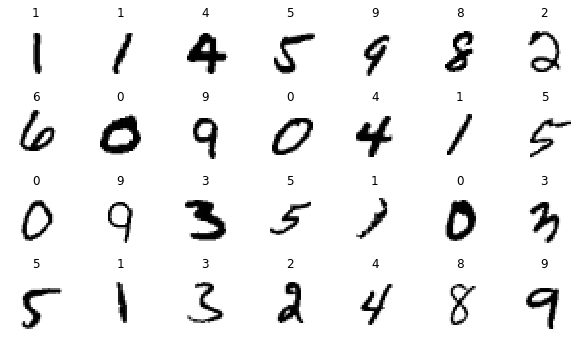

In [51]:
r, c = 4, 7
fig = plt.subplots(figsize=(c*1.2,r*1.2))
for row in range(r):
  for col in range(c):
    plt.subplot(r, c, c*row+col+1)
    ix = random.randint(0, len(train_dataset)-1)
    img, label = train_dataset[ix]
    plt.imshow(img.reshape(28,28), cmap="binary")
    plt.axis('off')
    plt.title(label.item())
plt.tight_layout()
plt.show()

To feed the network in batches, we need to create a `Dataloader`.

In [52]:
from torch.utils.data import DataLoader 

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64)

imgs, labels = next(iter(train_dataloader))

imgs.shape, imgs.dtype, imgs.max(), imgs.min()

(torch.Size([64, 784]), torch.float32, tensor(1.), tensor(0.))

You can also create your custom networks

In [53]:
import torch.nn.functional as F

class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(784, 100)
    self.fc2 = torch.nn.Linear(100, 10)
  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x
    
net = Net()
outputs = net(imgs)
outputs.shape

torch.Size([64, 10])

In [54]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss = torch.nn.CrossEntropyLoss()

fit(net, train_dataloader, test_dataloader, optimizer, loss)

100%|███████████████████████████████| 219/219 [00:00<00:00, 436.26it/s]


Epoch: 1/5
 Train loss: 0.4548 Test loss: 0.2761 Train Acc: 49289/56000 (88 %) Test Acc: 12835/14000 (91 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 336.41it/s]


Epoch: 2/5
 Train loss: 0.2294 Test loss: 0.2121 Train Acc: 52297/56000 (93 %) Test Acc: 13125/14000 (93 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 446.03it/s]


Epoch: 3/5
 Train loss: 0.1771 Test loss: 0.1720 Train Acc: 53161/56000 (94 %) Test Acc: 13268/14000 (94 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 466.95it/s]


Epoch: 4/5
 Train loss: 0.1448 Test loss: 0.1462 Train Acc: 53677/56000 (95 %) Test Acc: 13402/14000 (95 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 373.70it/s]


Epoch: 5/5
 Train loss: 0.1226 Test loss: 0.1268 Train Acc: 54033/56000 (96 %) Test Acc: 13463/14000 (96 %)


To run computations on a `GPU` you only need to copy the network and data to the device.

In [55]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [56]:
def fit_gpu(model, train_loader, test_loader, optimizer, loss, device, epochs=10):
  model.to(device) # COPY MODEL TO GPU
  for epoch in range(1, epochs+1):
      # train
      model.train() # VERY IMPORTANT !
      train_loss, train_acc = [], 0
      for imgs, labels in tqdm(train_loader):
        imgs, labels = imgs.to(device), labels.to(device) # COPY DATA TO GPU 
        optimizer.zero_grad() # VERY IMPORTANT !
        output = model(imgs.reshape(imgs.shape[0],28*28))
        l = loss(output, labels)
        l.backward()
        optimizer.step()
        train_acc += (torch.argmax(output, axis=1) == labels).sum()
        train_loss.append(l.item())
      # eval
      model.eval() # VERY IMPORTANT !
      test_loss, test_acc = [], 0
      with torch.no_grad():
        for imgs, labels in tqdm(test_loader):
          imgs, labels = imgs.to(device), labels.to(device) # COPY DATA TO GPU 
          output = model(imgs.reshape(imgs.shape[0],28*28))
          l = loss(output, labels)
          test_acc += (torch.argmax(output, axis=1) == labels).sum()
          test_loss.append(l.item())
      print(f'Epoch: {epoch}/{epochs}\n Train loss: {np.mean(train_loss):.4f} Test loss: {np.mean(test_loss):.4f} Train Acc: {train_acc}/{len(train_dataset)} ({100*train_acc/len(train_dataset)} %) Test Acc: {test_acc}/{len(test_dataset)} ({100*test_acc/len(test_dataset)} %)')

In [57]:
fit_gpu(net, train_dataloader, test_dataloader, optimizer, loss, device)

100%|███████████████████████████████| 219/219 [00:00<00:00, 506.34it/s]


Epoch: 1/10
 Train loss: 0.1068 Test loss: 0.1154 Train Acc: 54284/56000 (96 %) Test Acc: 13484/14000 (96 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 496.60it/s]


Epoch: 2/10
 Train loss: 0.0939 Test loss: 0.1106 Train Acc: 54497/56000 (97 %) Test Acc: 13509/14000 (96 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 506.95it/s]


Epoch: 3/10
 Train loss: 0.0847 Test loss: 0.1017 Train Acc: 54632/56000 (97 %) Test Acc: 13561/14000 (96 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 498.86it/s]


Epoch: 4/10
 Train loss: 0.0767 Test loss: 0.0959 Train Acc: 54786/56000 (97 %) Test Acc: 13587/14000 (97 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 506.94it/s]


Epoch: 5/10
 Train loss: 0.0696 Test loss: 0.0910 Train Acc: 54875/56000 (97 %) Test Acc: 13596/14000 (97 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 504.61it/s]


Epoch: 6/10
 Train loss: 0.0639 Test loss: 0.0880 Train Acc: 54979/56000 (98 %) Test Acc: 13602/14000 (97 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 506.94it/s]


Epoch: 7/10
 Train loss: 0.0585 Test loss: 0.0831 Train Acc: 55072/56000 (98 %) Test Acc: 13639/14000 (97 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 502.36it/s]


Epoch: 8/10
 Train loss: 0.0543 Test loss: 0.0826 Train Acc: 55134/56000 (98 %) Test Acc: 13619/14000 (97 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 508.13it/s]


Epoch: 9/10
 Train loss: 0.0501 Test loss: 0.0802 Train Acc: 55248/56000 (98 %) Test Acc: 13649/14000 (97 %)


100%|███████████████████████████████| 219/219 [00:00<00:00, 506.95it/s]


Epoch: 10/10
 Train loss: 0.0461 Test loss: 0.0796 Train Acc: 55295/56000 (98 %) Test Acc: 13638/14000 (97 %)


Notice that the code will also work if a GPU is not available, making it generic for all devices.

Finally, you can save and load your model.

In [58]:
torch.save(net.cpu(), "my_model.pth")

C:\Users\sensio\miniconda3\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [59]:
net = torch.load("my_model.pth")

To learn more about Pytorch, the tutorials section in [pytorch.org](https://pytorch.org/tutorials/) is the best place.